<a href="https://colab.research.google.com/github/IslombekTurakulov/NotebookWorks/blob/add-license-1/TurakulovIslombek_Alg_16_2020_par_task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import sympy
import numpy as np
from sympy import Eq, plot_implicit, Matrix, plot, symbols
from sympy.core import sympify
from sympy.geometry.point import Point, Point2D, Point3D
from sympy.geometry.line import Line
from sympy.core.symbol import _symbol
from sympy import pi as Pi
from sympy import cos as Cos
from sympy import sin as Sin
from sympy.geometry.entity import GeometryEntity, GeometrySet
import matplotlib.pyplot as plt

# Занятие 16
# Алгебра
## Кривые второго порядка на плоскости: парабола

### Задание 1
Определить класс parabola по образцу класса ellipse.

Реализовать атрибуты: 

параметр $p$,

вершина (vertex) в виде точки Point

фокус (focus) в виде точки Point

угол angle по умолчанию 0 для параболы с осью, параллельной OX, 
а для параболы с осью, параллельной  OY angle = $\pi/2$

ось симметрии (axis_symmetry) в виде прямой Line

директриса (directrix) в виде прямой Line

Реализовать методы 

equation(self) - уравнение параболы,

dir_equation(self) - уравнение директрисы,

ax_sym_equation(self) - уравнение оси симметрии,

rotate(self, angle) - поворот на угол angle против часовой стрелки, метод не изменяет параболу, а возвращает параболу с теми же p и вершиной, но угол увеличен на angle по сравнению с исходной параболой. 

В конструкторе экземпляра класса  

__new__(cls, p, vertex=None, angle=None)

p - обязательный параметр, а вид параболы по умолчанию  - парабола с осью, параллельной оси OX,
вершина по умолчанию в начале координат.

In [ ]:
class Parabola(GeometrySet):

  def __new__(
      cls, p, vertex=None, angle=None, **kwargs):
      
      p = sympify(p)

      if vertex is None:
          vertex = Point(0, 0)
      else:
          vertex = Point(vertex, dim=2)

      if len(vertex) != 2:
          raise ValueError('The vertex of "{0}" must be a two dimensional point'.format(cls))

      if angle is None:
          angle = 0
      else:
        angle = angle % (2*sympy.pi)


      return GeometryEntity.__new__(cls, p, vertex, angle, **kwargs)
    
  @property
  def p(self):
    return self.args[0]

  @property
  def vertex(self):
    return self.args[1]

  @property
  def angle(self):
    return self.args[2]

  @property
  def foci(self):
    return Point(self.vertex[0] + self.p * sympy.cos(self.angle), 
                    self.vertex[1] + self.p * sympy.sin(self.angle))
      
  @property
  def axis_symmetry(self):
    return Line(self.vertex, self.foci)

  @property
  def directrix(self):
    return self.axis_symmetry.perpendicular_line(
        Point(self.vertex[0] - self.p * sympy.cos(self.angle), 
        self.vertex[1] - self.p * sympy.sin(self.angle)))

  def equation(self):
    x, y, p, x1, y1 = symbols('x y p x1 y1')
    angle = self.angle
    A = Matrix([[Cos(angle),  Sin(angle)],
               [-Sin(angle), Cos(angle)]])
    X = Matrix((x-x1, y - y1))
    X_new = A*X
    eq = (X_new[1])**2 - 2*p*(X_new[0])

    return eq.subs({x1:self.vertex[0], y1:self.vertex[1], p:self.p})

  def dir_equation(self):
    x, y = symbols('x y')
    return self.directrix.equation(x = x, y=y)

  def ax_sym_equation(self):
    x, y = symbols('x y')
    return self.axis_symmetry.equation(x = x, y=y)

  def rotate(self, angle):
    return Parabola(self.p, vertex = self.vertex, angle = self.angle + angle)

### Задание 2
Построить параболу с $p = 3$, вершиной в (-5, 2), осью симметрии, образующей угол $\pi/4$ с положительным направлением оси ОХ. Вывести на экран ее параметр p, вершину, угол, фокус, ось симметрии и директрису, а также уравнение параболы, оси симметрии и директрисы. 

'p'

3

'vertex'

Point2D(-5, 2)

'angle'

pi/4

'foci'

Point2D(-5 + 3*sqrt(2)/2, 2 + 3*sqrt(2)/2)

'axis symmetry'

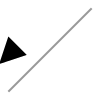

'directrix'

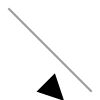

'equation'

3*sqrt(2)*(2 - y) - 3*sqrt(2)*(x + 5) + (x - y + 7)**2/2

'axis symmetry equation'

3*sqrt(2)*(-x + y - 7)/2

'dir equation'

-3*sqrt(2)*x/2 - 3*sqrt(2)*y/2 - 9 - 9*sqrt(2)/2

In [ ]:
parabola = Parabola(3, vertex = Point(-5, 2), angle = sympy.pi/4)
props = {'p': parabola.p, 'vertex': parabola.vertex,
         'angle': parabola.angle, 'foci': parabola.foci,
         'axis symmetry':parabola.axis_symmetry, 'directrix': parabola.directrix,
         'equation': parabola.equation().simplify(), 
         'axis symmetry equation': parabola.ax_sym_equation().simplify(), 
         'dir equation': parabola.dir_equation().simplify()}

for key in props.keys():
    display(key, props[key])

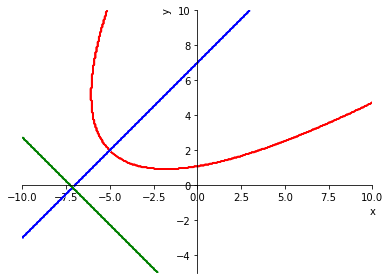

In [ ]:
from sympy.abc import x, y
eqHyp = parabola.equation()
dict_free = {str(a): a for a in eqHyp.free_symbols}
s = plot_implicit(parabola.equation(),(dict_free['x'], -10, 10), (dict_free['y'], -5, 10) ,aspect_ratio=(1,1), line_color = 'r',  adaptive=False, show = False)

for i, item in enumerate([parabola.ax_sym_equation().simplify(), parabola.dir_equation().simplify()]):
  if i<1:
    color = 'b'
  else:
    color = 'g'
    
  s.extend(
      plot_implicit(item, (dict_free['x'], -10, 10), (dict_free['y'], -5, 10),
              line_color=color, aspect_ratio=(1, 1), adaptive=False, show = False)
  )

s.show()

### Индивидуальное задание 139
Построить параболу, построить другую параболу путем поворота исходной параболы на $\alpha$. Вывести на экран вершину, угол, фокус, ось симметрии и директрису обеих парабол. 

Использовать уравнения повернутой параболы, ее оси симметрии и директрисы для построения графиков в одной координатной плоскости. 

Цвета параболы, оси симметрии, директрисы индивидуальные, название графика Парабола, подписи осей $x$ и $y$.

$p = 8$, $\alpha = \frac{2 \pi}{3}$.

'vertex'

Point2D(0, 0)

'angle'

2*pi/3

'foci'

Point2D(-4, 4*sqrt(3))

'axis symmetry'

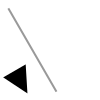

'directrix'

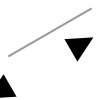

In [ ]:
parabola = Parabola(8, angle = 2*sympy.pi/3)
eqHyp = parabola.equation()
dict_free = {str(a): a for a in eqHyp.free_symbols}
props = {'vertex': parabola.vertex,
         'angle': parabola.angle, 'foci': parabola.foci,
         'axis symmetry':parabola.axis_symmetry, 'directrix': parabola.directrix}

for key in props.keys():
    display(key, props[key])

'vertex'

Point2D(0, 0)

'angle'

47*pi/30

'foci'

Point2D(4*sqrt(3)*(1/4 - sqrt(5)/4) + 4*sqrt(sqrt(5)/8 + 5/8), -4*sqrt(3)*sqrt(sqrt(5)/8 + 5/8) - sqrt(5) + 1)

'axis symmetry'

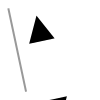

'directrix'

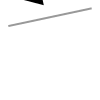

In [ ]:

rotatedParabola = parabola.rotate(9*sympy.pi/10)
props = {'vertex': rotatedParabola.vertex,
         'angle': rotatedParabola.angle, 'foci': rotatedParabola.foci,
         'axis symmetry':rotatedParabola.axis_symmetry, 'directrix': rotatedParabola.directrix}

for key in props.keys():
    display(key, props[key])

/usr/local/lib/python3.7/dist-packages/sympy/plotting/plot.py:1406: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  self.fig.tight_layout()


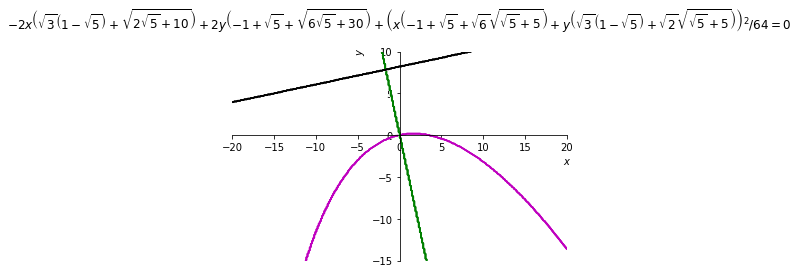

In [ ]:
p = plot_implicit(rotatedParabola.equation().simplify(),(dict_free['x'], -20, 20), (dict_free['y'], -15, 10) ,
                  title = sympy.latex(sympy.Eq(rotatedParabola.equation().simplify(), 0), mode = 'inline') + '\n',
                  xlabel='$x$',ylabel='$y$', 
                  aspect_ratio=(1,1), line_color = 'm',  adaptive=False, show = False)

for i, item in enumerate([rotatedParabola.ax_sym_equation().simplify(), rotatedParabola.dir_equation().simplify()]):
  if i<1:
    color = 'g'
  else:
    color = 'k'
    
  p.extend(
      plot_implicit(item, (dict_free['x'], -20, 20), (dict_free['y'], -15, 10),
              line_color=color, adaptive=False, show = False)
  )

p.show()